In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/int88/onnx/default/1/QAT_int_8.onnx
/kaggle/input/kd_final_3/keras/default/1/student_model_final (3).h5
/kaggle/input/mm/onnx/default/1/QAT_on.onnx
/kaggle/input/dataset/data.npz
/kaggle/input/stripped/keras/default/1/stripped_model.h5
/kaggle/input/onnx/keras/default/1/QAT_on.onnx


In [2]:
def get_overall_sparsity(model, threshold=1e-8):
    total_params = 0
    zero_params = 0
    for layer in model.layers:
        for weight in layer.trainable_weights:
            w_val = weight.numpy()
            total_params += w_val.size
            zero_params += np.sum(np.abs(w_val) < threshold)
    return 100.0 * zero_params / total_params


Loaded distilled model:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 170, 64)             │       1,920,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 170, 128)            │          49,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │          74,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,069,251 (7.89 MB)

 Trainable params: 2,069,249 (7.89 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)


Rebuilt QAT model:


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 170)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 170, 64)             │       1,920,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ custom_qat_wrapper                   │ (None, 170, 128)            │          49,920 │
│ (CustomQATWrapper)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ custom_qat_wrapper_1                 │ (None, 128)                 │          74,496 │
│ (CustomQATWrapper)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,069,249 (7.89 MB)

 Trainable params: 2,069,249 (7.89 MB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/4


Training: 6836it [30:26,  3.74it/s, loss=0.151]                          
Validation: 1465it [02:11, 11.16it/s, val_accuracy=0.928, val_loss=0.204]                          


Train Loss: 0.1510, Train Acc: 0.9478
Val Loss: 0.2044, Val Acc: 0.9278
Overall effective sparsity of the model : 7.0850825589380495%

Epoch 2/4


Training: 6836it [30:36,  3.72it/s, loss=0.15]                           
Validation: 1465it [02:05, 11.66it/s, val_accuracy=0.928, val_loss=0.205]                          


Train Loss: 0.1500, Train Acc: 0.9483
Val Loss: 0.2052, Val Acc: 0.9277
Overall effective sparsity of the model : 7.0850825589380495%

Epoch 3/4


Training: 6836it [30:11,  3.77it/s, loss=0.149]                          
Validation: 1465it [02:12, 11.08it/s, val_accuracy=0.928, val_loss=0.206]                          


Train Loss: 0.1492, Train Acc: 0.9486
Val Loss: 0.2057, Val Acc: 0.9277
Overall effective sparsity of the model : 7.0850825589380495%

Epoch 4/4


Training: 6836it [30:36,  3.72it/s, loss=0.149]                          
Validation: 1465it [02:09, 11.32it/s, val_accuracy=0.928, val_loss=0.206]                          


Train Loss: 0.1486, Train Acc: 0.9490
Val Loss: 0.2063, Val Acc: 0.9276
Overall effective sparsity of the model : 7.085130885649818%


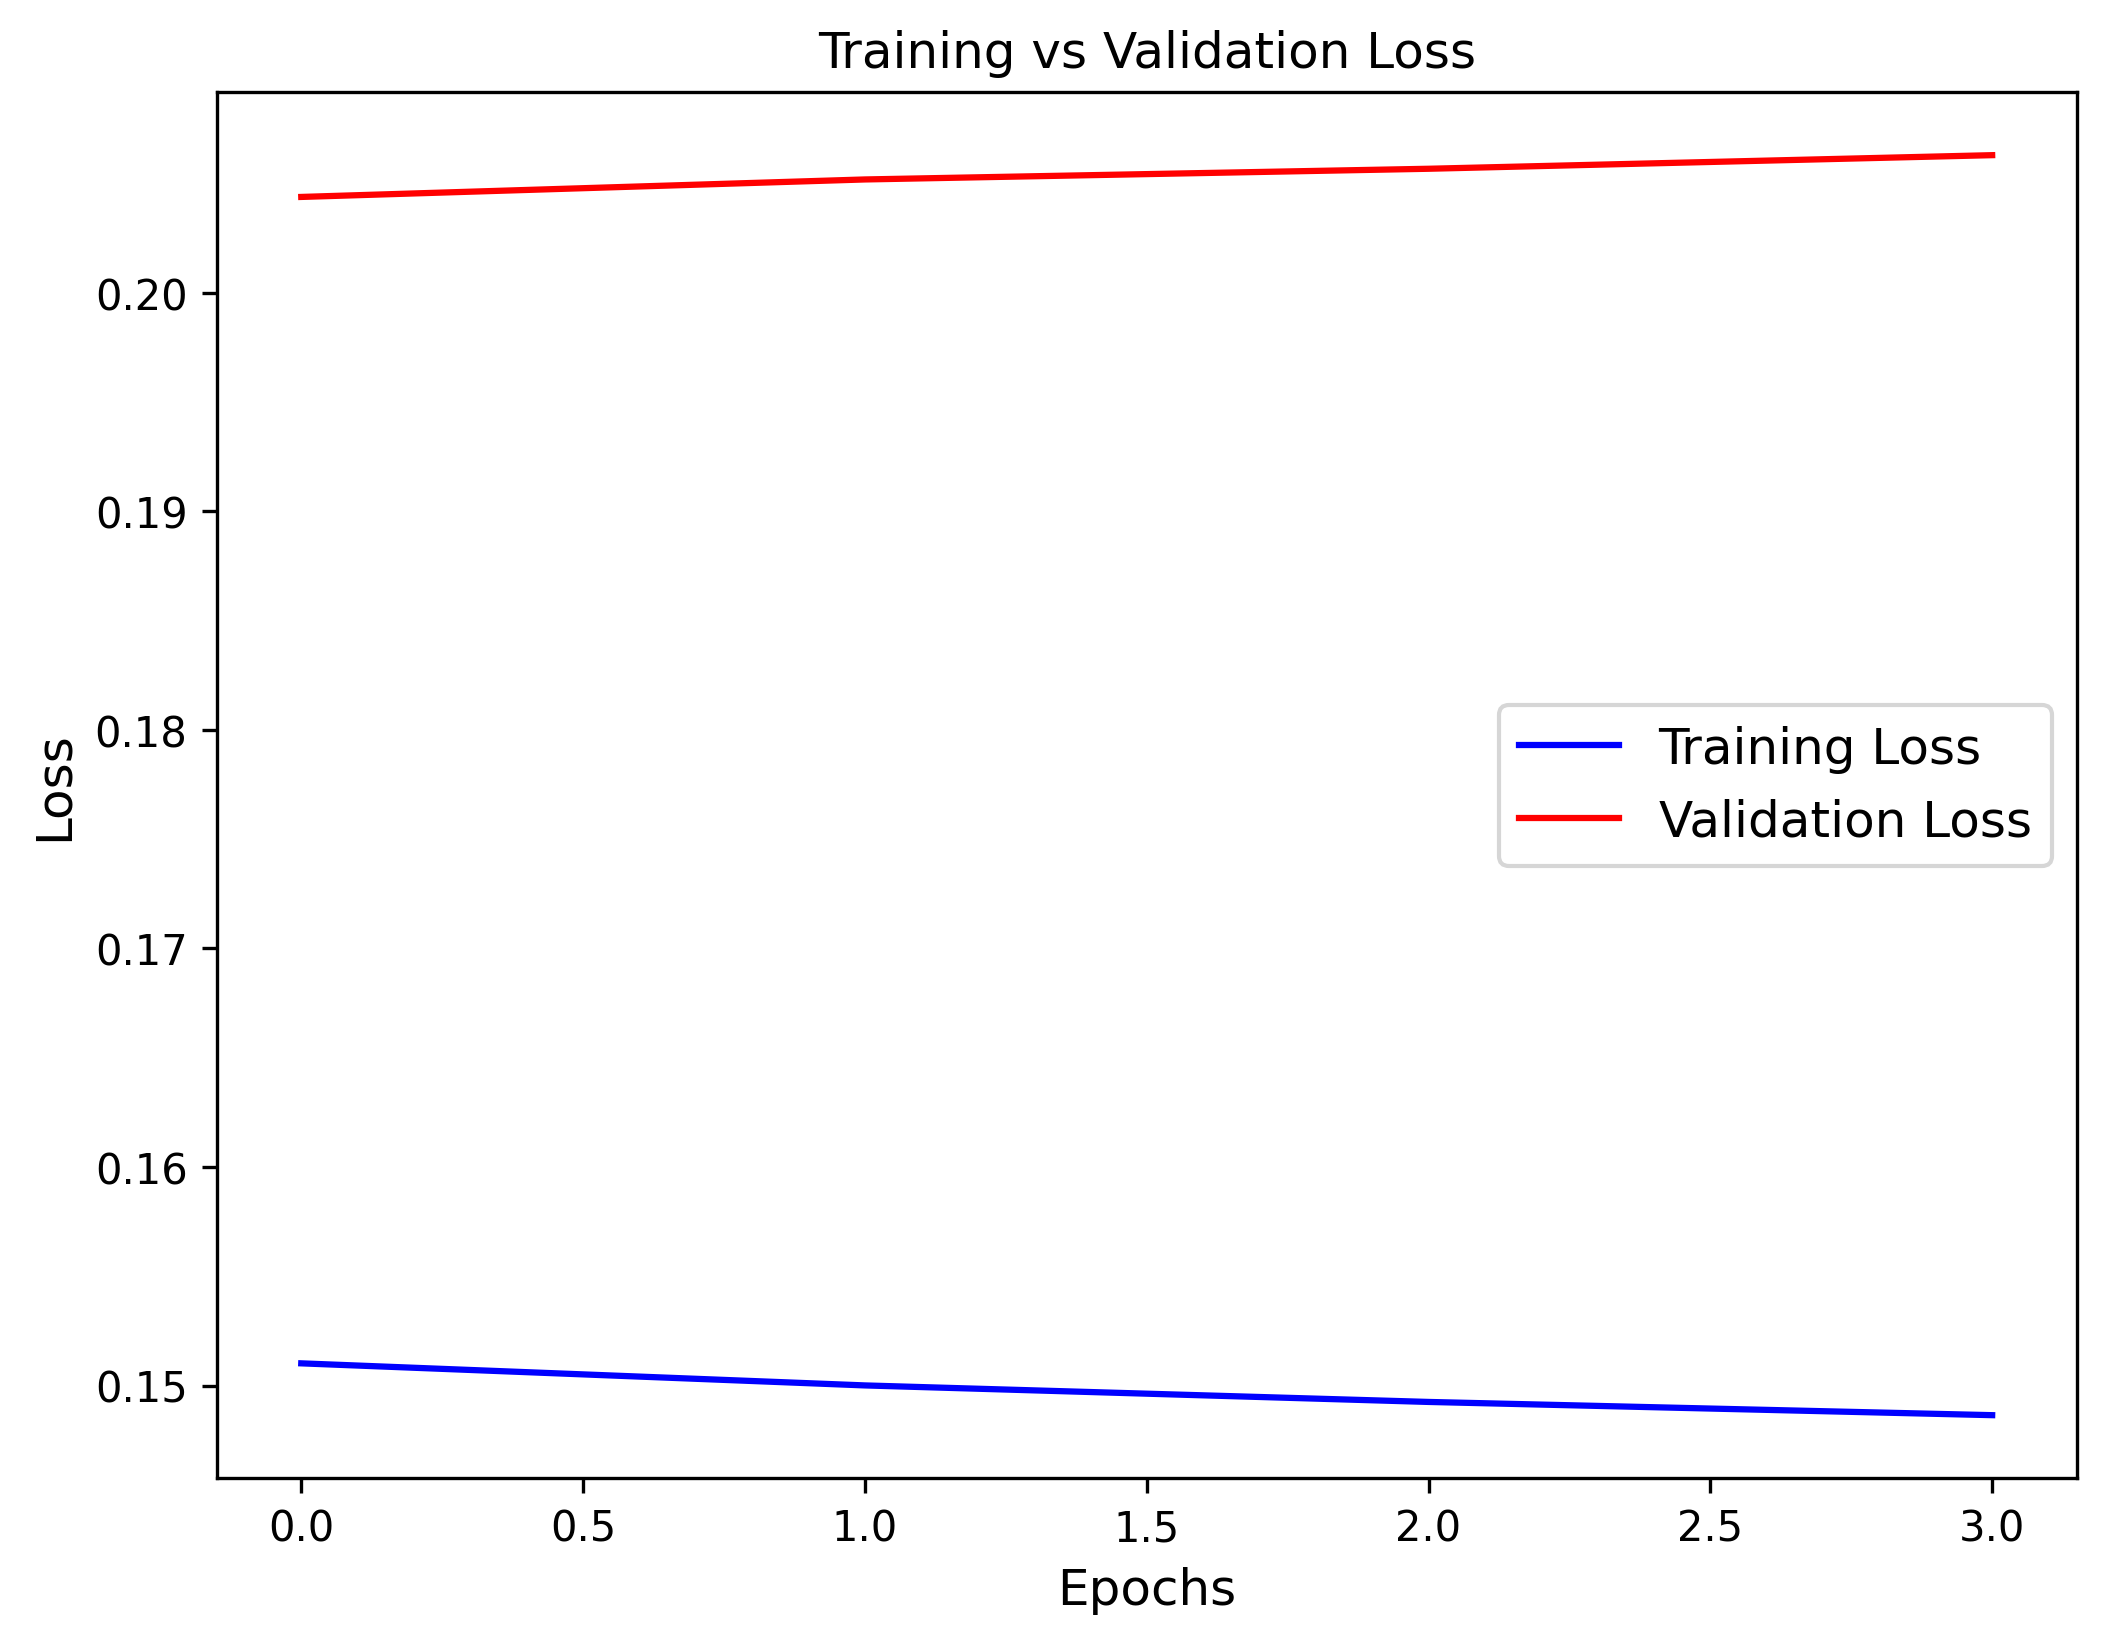

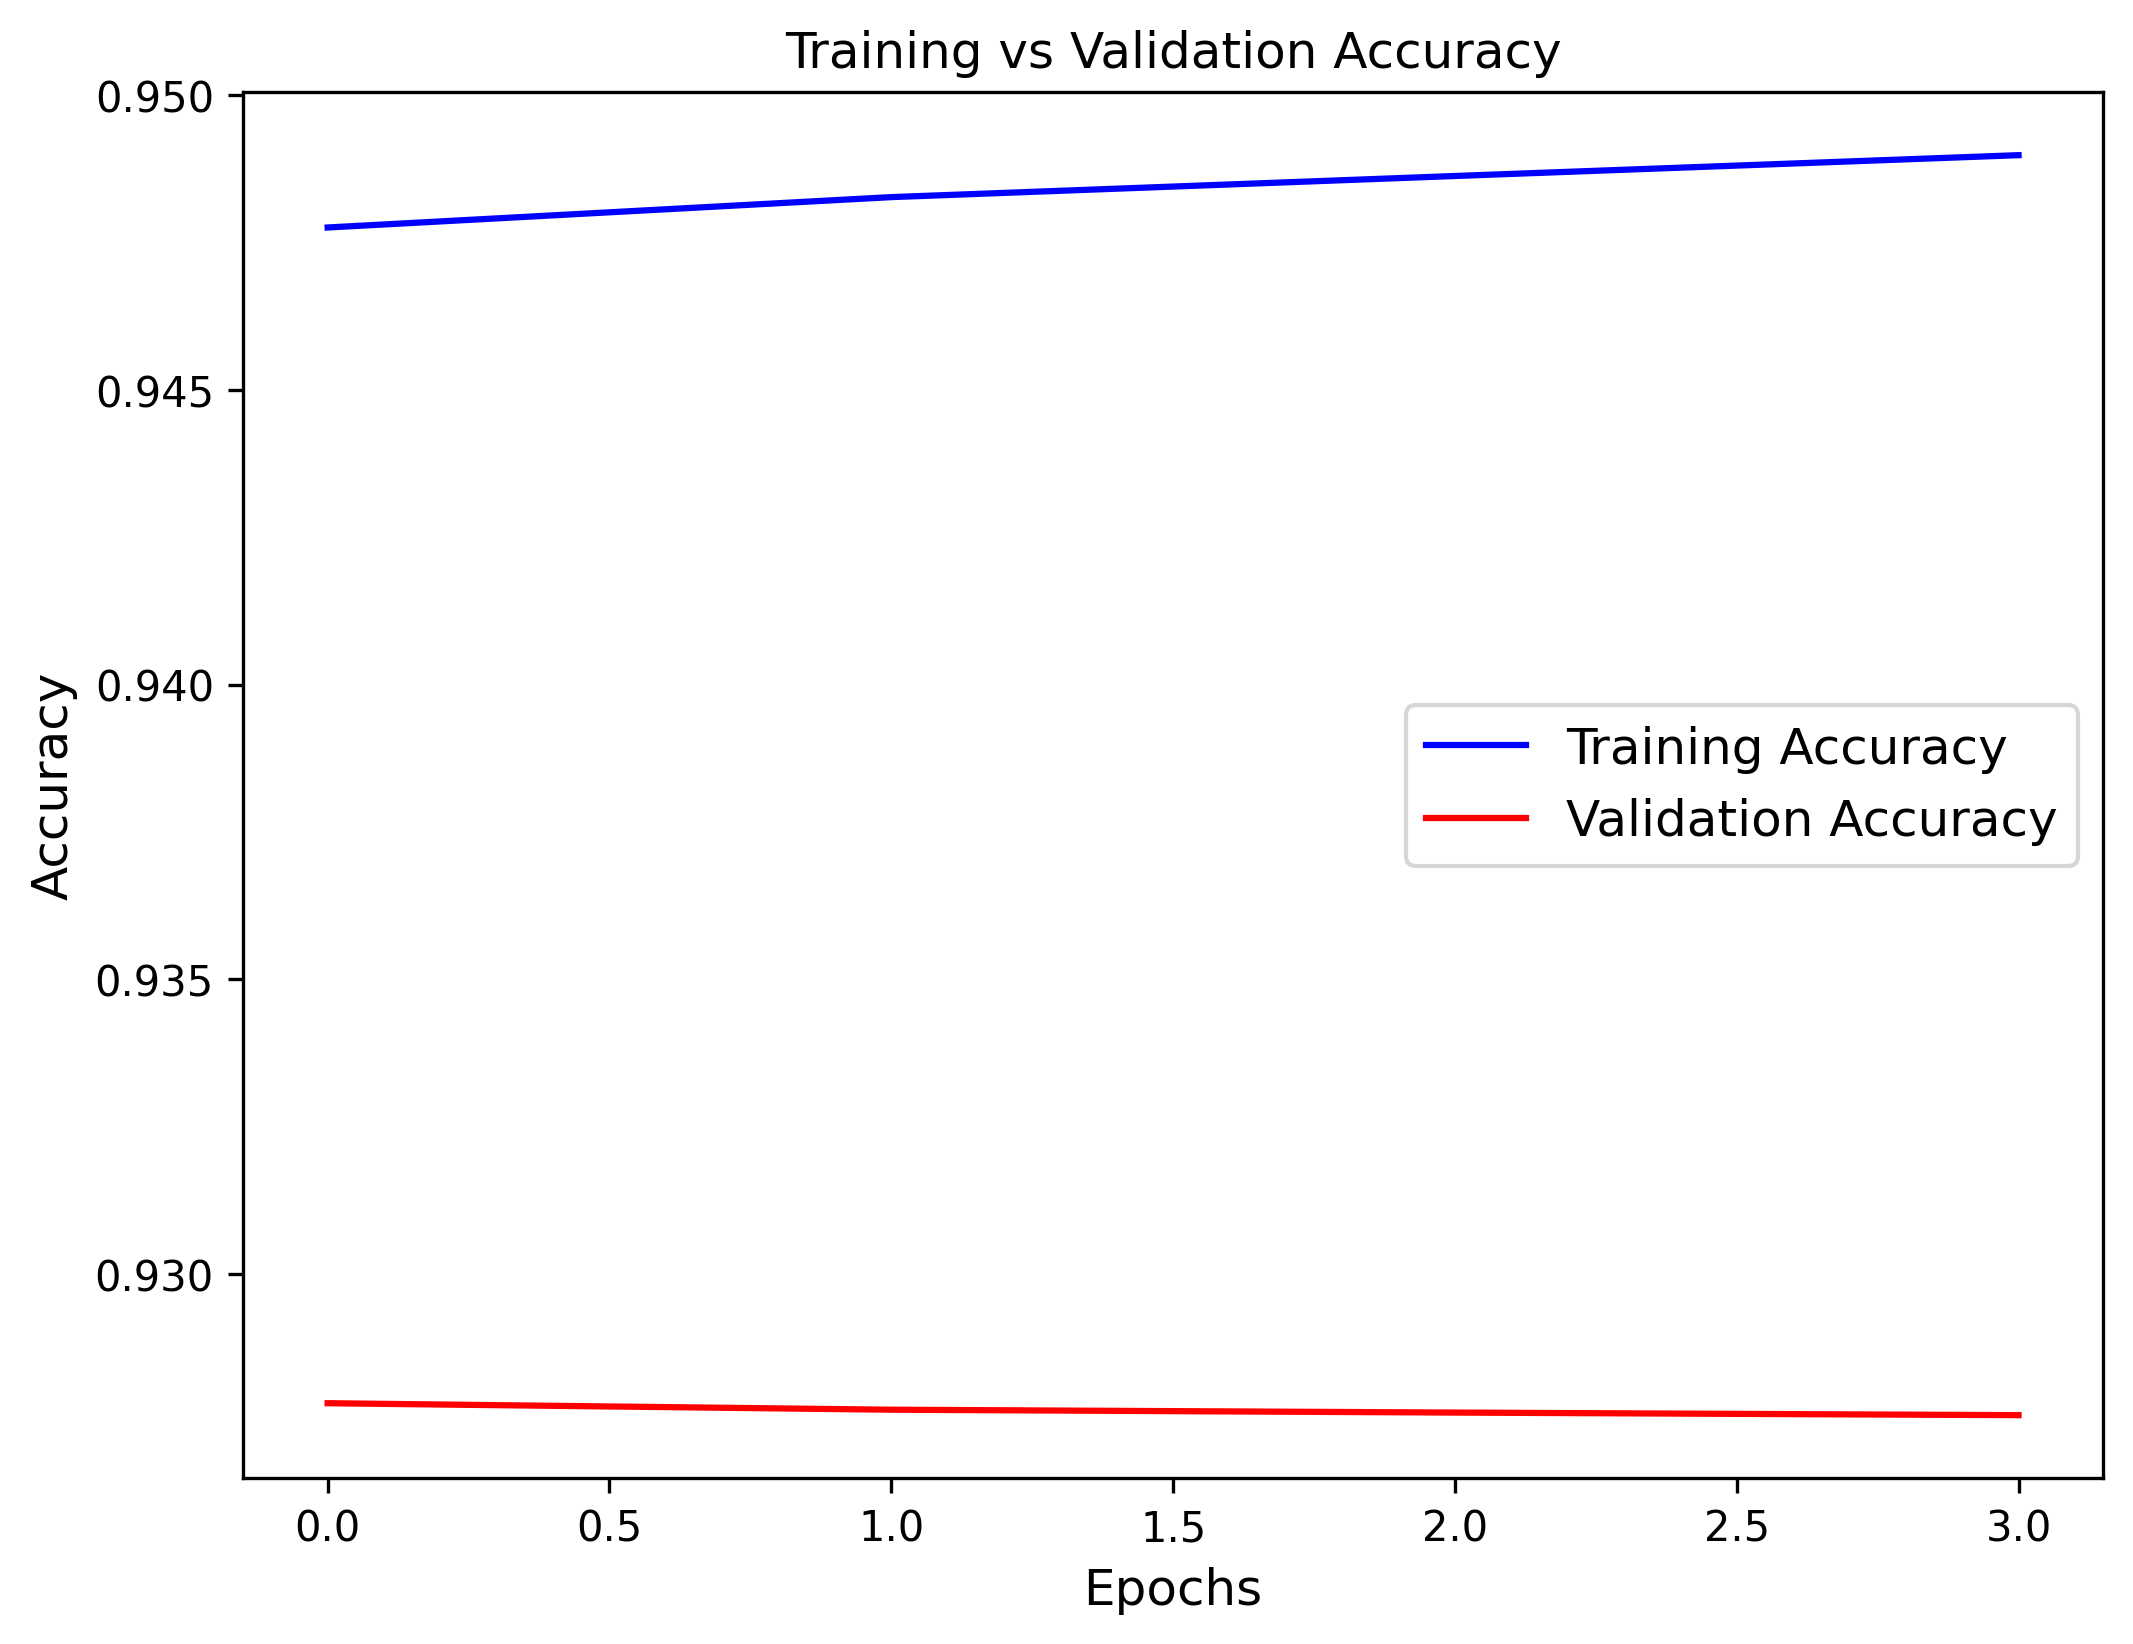

1465/1465 ━━━━━━━━━━━━━━━━━━━━ 59s 39ms/step - accuracy: 0.9280 - loss: 0.2061
Evaluation results: [0.206301748752594, 0.9276113510131836]


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input
from tensorflow.keras.utils import plot_model
from tqdm import tqdm

# =============================================================================
# Custom QAT Wrapper (unchanged)
# =============================================================================
class CustomQATWrapper(tf.keras.layers.Wrapper):
    def __init__(self, layer, num_bits=8, **kwargs):
        """
        Wrap a layer to apply fake quantization on its trainable weights and outputs.
        This simulates quantization during the forward pass while using full-precision weights for backprop.
        """
        super(CustomQATWrapper, self).__init__(layer, **kwargs)
        self.num_bits = num_bits

    def build(self, input_shape):
        self.layer.build(input_shape)
        super(CustomQATWrapper, self).build(input_shape)

    def call(self, inputs, training=None):
        # Backup original weights using tf.identity.
        original_weights = [tf.identity(w) for w in self.layer.trainable_weights]
        quantized_weights = []
        # Fake quantize each trainable weight.
        for w in self.layer.trainable_weights:
            w_min = tf.reduce_min(w)
            w_max = tf.reduce_max(w)
            w_q = tf.quantization.fake_quant_with_min_max_vars(w, w_min, w_max, num_bits=self.num_bits)
            quantized_weights.append(w_q)
        # Temporarily assign quantized weights.
        for w, w_q in zip(self.layer.trainable_weights, quantized_weights):
            w.assign(w_q)
        # Forward pass.
        outputs = self.layer(inputs, training=training)
        # Fake quantize the outputs.
        out_min = tf.reduce_min(outputs)
        out_max = tf.reduce_max(outputs)
        outputs_q = tf.quantization.fake_quant_with_min_max_vars(outputs, out_min, out_max, num_bits=self.num_bits)
        # Restore original weights.
        for w, orig in zip(self.layer.trainable_weights, original_weights):
            w.assign(orig)
        return outputs_q

    def compute_output_shape(self, input_shape):
        return self.layer.compute_output_shape(input_shape)

    def get_config(self):
        config = super(CustomQATWrapper, self).get_config()
        config.update({'num_bits': self.num_bits})
        return config
# =============================================================================
# Rebuild Model with Custom QAT Wrappers
# =============================================================================
def rebuild_model_with_custom_qat(original_model, num_bits=8):
    """
    Rebuild a new functional model from the original model by re-instantiating each layer
    from its config and wrapping every layer that has trainable weights with the custom QAT wrapper.
    """
    inputs = Input(shape=(170,), dtype=tf.int32)  # Specify input shape and dtype
    x = inputs
    for layer in original_model.layers:
        config = layer.get_config()
        new_layer = layer.__class__.from_config(config)
        # For layers with trainable weights, wrap them.
        if new_layer.trainable_weights or (hasattr(new_layer, 'weights') and new_layer.weights):
            x = CustomQATWrapper(new_layer, num_bits=num_bits)(x)
        else:
            x = new_layer(x)
    new_model = Model(inputs=inputs, outputs=x)
    # Copy weights from original model.
    new_model.set_weights(original_model.get_weights())
    return new_model
# =============================================================================
# 3. Load the Distilled Model and Rebuild with Custom QAT
# =============================================================================
distilled_model_path = '/kaggle/input/kd_final_3/keras/default/1/student_model_final (3).h5'
original_model = load_model(distilled_model_path)
print("Loaded distilled model:")
original_model.summary()

# Call the model with dummy data to force shape inference
dummy_input = np.zeros((1, 170), dtype=np.int32) # 1 sample of shape (170,)
original_model(dummy_input)

# Rebuild the model with our custom QAT wrappers
qat_model = rebuild_model_with_custom_qat(original_model, num_bits=8)
print("\nRebuilt QAT model:")
qat_model.summary()

# =============================================================================
# 5. Prepare Training and Validation Data
# =============================================================================
data = np.load("/kaggle/input/dataset/data.npz")
X_train_np, y_train_np = data["X_train"], data["y_train"]
X_val_np, y_val_np     = data["X_val"], data["y_val"]

batch_size = 1024
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_np, y_train_np)) \
                    .batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_np, y_val_np)) \
                    .batch(batch_size).prefetch(tf.data.AUTOTUNE)

X_test_np, y_test_np = data["X_test"], data["y_test"]

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_np, y_test_np)) \
                    .batch(batch_size).prefetch(tf.data.AUTOTUNE)

# =============================================================================
# Custom Training Loop with Gradient Masking (Using the Fixed Masks)
# =============================================================================
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=5e-5,
    decay_steps=1000,
    decay_rate=0.95,
    staircase=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=False)
train_loss_metric = tf.keras.metrics.Mean(name='train_loss', dtype=tf.float32)
train_acc_metric = tf.keras.metrics.BinaryAccuracy(name='train_accuracy')
val_loss_metric = tf.keras.metrics.Mean(name='val_loss', dtype=tf.float32)
val_acc_metric = tf.keras.metrics.BinaryAccuracy(name='val_accuracy')

epochs = 4
train_loss_history = []
train_acc_history = []
val_loss_history = []
val_acc_history = []


pruned_mask = [tf.cast(tf.abs(w) > 0, dtype=tf.float32) for w in qat_model.trainable_variables]

# Training Loop
for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}/{epochs}")
    train_loss_metric.reset_state()
    train_acc_metric.reset_state()
    val_loss_metric.reset_state()
    val_acc_metric.reset_state()

    pbar = tqdm(total=len(X_train_np)//batch_size, desc="Training")
    for images, labels in train_dataset:
        labels = tf.reshape(labels, (-1, 1))
        with tf.GradientTape() as tape:
            preds = qat_model(images, training=True)
            loss = loss_fn(labels, preds)

        grads = tape.gradient(loss, qat_model.trainable_variables)
        # Apply fixed masks: if a weight was initially zero, keep its gradient zero.
        masked_grads = [grad * mask for grad, mask in zip(grads, pruned_mask)]
        optimizer.apply_gradients(zip(masked_grads, qat_model.trainable_variables))

        train_loss_metric.update_state(loss)
        train_acc_metric.update_state(labels, preds)
        pbar.set_postfix(loss=train_loss_metric.result().numpy())
        pbar.update(1)
    pbar.close()

    pbar = tqdm(total=len(X_val_np)//batch_size, desc="Validation")
    for images, labels in val_dataset:
        labels = tf.reshape(labels, (-1, 1))
        preds = qat_model(images, training=False)
        loss = loss_fn(labels, preds)
        val_loss_metric.update_state(loss)
        val_acc_metric.update_state(labels, preds)
        pbar.set_postfix(val_loss=val_loss_metric.result().numpy(),
                         val_accuracy=val_acc_metric.result().numpy())
        pbar.update(1)
    pbar.close()

    cur_train_loss = train_loss_metric.result().numpy()
    cur_train_acc = train_acc_metric.result().numpy()
    cur_val_loss = val_loss_metric.result().numpy()
    cur_val_acc = val_acc_metric.result().numpy()

    train_loss_history.append(cur_train_loss)
    train_acc_history.append(cur_train_acc)
    val_loss_history.append(cur_val_loss)
    val_acc_history.append(cur_val_acc)

    print(f"Train Loss: {cur_train_loss:.4f}, Train Acc: {cur_train_acc:.4f}")
    print(f"Val Loss: {cur_val_loss:.4f}, Val Acc: {cur_val_acc:.4f}")
    print(f"Overall effective sparsity of the model : {get_overall_sparsity(qat_model)}%")

# =============================================================================
# 8. Plot Training History with High-Quality Formatting
# =============================================================================
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(train_loss_history, label='Training Loss', color='blue')
plt.plot(val_loss_history, label='Validation Loss', color='red')
plt.xlabel('Epochs', fontsize=12, fontname='Times New Roman')
plt.ylabel('Loss', fontsize=12, fontname='Times New Roman')
plt.title('Training vs Validation Loss', fontsize=12, fontname='Times New Roman')
plt.legend(prop={'family': 'Times New Roman', 'size': 12})
plt.savefig('/kaggle/working/custom_qat_training_validation_loss.png', dpi=300)
plt.show()

plt.figure(figsize=(8, 6), dpi=300)
plt.plot(train_acc_history, label='Training Accuracy', color='blue')
plt.plot(val_acc_history, label='Validation Accuracy', color='red')
plt.xlabel('Epochs', fontsize=12, fontname='Times New Roman')
plt.ylabel('Accuracy', fontsize=12, fontname='Times New Roman')
plt.title('Training vs Validation Accuracy', fontsize=12, fontname='Times New Roman')
plt.legend(prop={'family': 'Times New Roman', 'size': 12})
plt.savefig('/kaggle/working/custom_qat_training_validation_accuracy.png', dpi=300)
plt.show()

qat_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# =============================================================================
# 7. Evaluate and Save the Custom QAT Model
# =============================================================================
eval_results = qat_model.evaluate(val_dataset)
print("Evaluation results:", eval_results)

In [4]:
def strip_custom_qat(model):
    inputs = Input(shape=model.input_shape[1:], dtype=model.input.dtype)
    x = inputs
    for layer in model.layers[1:]:
        if isinstance(layer, CustomQATWrapper):
            # Replace wrapper with its underlying layer.
            x = layer.layer(x)
        else:
            x = layer(x)
    stripped_model = Model(inputs=inputs, outputs=x)
    stripped_model.set_weights(model.get_weights())
    return stripped_model

stripped_model = strip_custom_qat(qat_model)
print("\nStripped model (for TFLite conversion):")
stripped_model.save("/kaggle/working/stripped_model.h5")
stripped_model.summary()



Stripped model (for TFLite conversion):


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 170)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 170, 64)             │       1,920,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 170, 128)            │          49,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │          74,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,069,249 (7.89 MB)

 Trainable params: 2,069,249 (7.89 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
!pip install tf2onnx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 24.4 MB/s eta 0:00:00


In [5]:
!pip install onnxruntime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 106.1 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.1 MB/s eta 0:00:00


In [4]:
import tensorflow as tf
import tf2onnx

# Load Keras model
model = tf.keras.models.load_model("/kaggle/input/stripped/keras/default/1/stripped_model.h5")

# Define input signature manually
input_signature = [tf.TensorSpec(model.input_shape, tf.float32, name="input")]

# Convert Keras model to ONNX
onnx_model_path = "/kaggle/working/QAT_on1.onnx"
onnx_model, _ = tf2onnx.convert.from_keras(model, input_signature=input_signature, opset=13)

# Save ONNX model
with open(onnx_model_path, "wb") as f:
    f.write(onnx_model.SerializeToString())

print(f"✅ Model successfully converted to ONNX: {onnx_model_path}")


✅ Model successfully converted to ONNX: /kaggle/working/QAT_on1.onnx


In [5]:
from onnxruntime.quantization import quantize_static, QuantType, CalibrationDataReader
import numpy as np
import onnx
import os

# Define model paths
qat_model_path = "/kaggle/working/QAT_on1.onnx"  # Your QAT-trained ONNX model
int8_model_path = "/kaggle/working/QAT_int_8.onnx"

# Load calibration dataset (Replace with actual data)
calibration_data = np.load("/kaggle/input/dataset/data.npz")  # Ensure this file exists
X_calib = calibration_data["X_train"][:100]  # Use the first 100 samples for calibration

# **Fix: Ensure input shape is (batch_size, feature_size)**
X_calib = X_calib.reshape(-1, X_calib.shape[-1])  # Convert to 2D (batch, features)

# Define custom calibration data reader
class CalibrationDataReaderExample(CalibrationDataReader):
    def __init__(self, data):
        self.data = data
        self.enum_data = iter([{"input": d[np.newaxis, :].astype(np.float32)} for d in self.data])  # Fix input shape

    def get_next(self):
        return next(self.enum_data, None)  # Returns None when exhausted

    def rewind(self):
        self.enum_data = iter([{"input": d[np.newaxis, :].astype(np.float32)} for d in self.data])

# Create calibration data reader
calibration_reader = CalibrationDataReaderExample(X_calib)

# Apply Static Quantization
quantized_model = quantize_static(
    qat_model_path, 
    int8_model_path, 
    calibration_reader,  # Corrected: Pass calibration data reader
    weight_type=QuantType.QInt8,  # INT8 Weights
    activation_type=QuantType.QInt8  # INT8 Activations (for full INT8 inference)
)

# Compare sizes
qat_size = os.path.getsize(qat_model_path) / 1024
int8_size = os.path.getsize(int8_model_path) / 1024

print(f"✅ QAT INT8 Model saved. Original: {qat_size:.2f} KB → INT8: {int8_size:.2f} KB")


✅ QAT INT8 Model saved. Original: 8144.29 KB → INT8: 2478.30 KB


In [ ]:
import numpy as np

# Load dataset (replace with actual path)
data = np.load("/kaggle/input/dataset/data.npz")  # Ensure this file contains test data
X_test = data["X_test"]
y_test = data["y_test"]

# Ensure input shape matches ONNX model
X_test = X_test.reshape(-1, X_test.shape[-1])  # Ensure (batch, features)


In [ ]:
import onnxruntime as ort

# Load ONNX models
# fp32_model = ort.InferenceSession("/kaggle/working/QC__student_model.onnx")
int8_model = ort.InferenceSession("/kaggle/working/QAT_int_8.onnx")


In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
from tqdm import tqdm

def evaluate_onnx_model(onnx_model, X_test, y_test, batch_size=1024):
    """
    Evaluate ONNX model accuracy and loss using batch inference.
    """
    total_samples = len(X_test)
    predictions = []

    # Process in batches
    for i in tqdm(range(0, total_samples, batch_size), desc="Evaluating ONNX Model", unit="batch"):
        batch_X = X_test[i:i + batch_size].astype(np.float32)  # Get batch
        input_data = {onnx_model.get_inputs()[0].name: batch_X}
        batch_output = onnx_model.run(None, input_data)[0]  # Run inference
        batch_pred = np.round(batch_output).astype(int)  # Round for classification
        predictions.extend(batch_pred)

    predictions = np.array(predictions).squeeze()

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)

    # Calculate loss (Mean Squared Error)
    loss = np.mean((y_test - predictions) ** 2)

    return accuracy, loss

# Evaluate INT8 quantized model with batch processing
batch_size = 1024  # Adjust batch size
int8_accuracy, int8_loss = evaluate_onnx_model(int8_model, X_test, y_test, batch_size=batch_size)

# Print results
print(f"✅ INT8 Model Accuracy: {int8_accuracy:.4f}, Loss: {int8_loss:.4f}")


In [6]:
import numpy as np
import onnxruntime as ort
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# Load dataset (ensure correct file path)
data = np.load("/kaggle/input/dataset/data.npz")  # Ensure this file contains test & validation data

# Extract test and validation sets
X_test, y_test = data["X_test"], data["y_test"]
X_val, y_val = data["X_val"], data["y_val"]

# Ensure input shape matches ONNX model
X_test = X_test.reshape(-1, X_test.shape[-1])  # Ensure (batch, features)
X_val = X_val.reshape(-1, X_val.shape[-1])  # Ensure (batch, features)

# Load ONNX INT8 model
int8_model = ort.InferenceSession("/kaggle/input/int88/onnx/default/1/QAT_int_8.onnx")

def evaluate_onnx_model(onnx_model, X_data, y_data, batch_size=1024):
    """
    Evaluate ONNX model accuracy and loss using batch inference.
    """
    total_samples = len(X_data)
    predictions = []

    # Process in batches
    for i in tqdm(range(0, total_samples, batch_size), desc="Evaluating ONNX Model", unit="batch"):
        batch_X = X_data[i:i + batch_size].astype(np.float32)  # Get batch
        input_data = {onnx_model.get_inputs()[0].name: batch_X}
        batch_output = onnx_model.run(None, input_data)[0]  # Run inference
        batch_pred = np.round(batch_output).astype(int)  # Round for classification
        predictions.extend(batch_pred)

    predictions = np.array(predictions).squeeze()

    # Calculate accuracy
    accuracy = accuracy_score(y_data, predictions)

    # Calculate loss (Mean Squared Error)
    loss = np.mean((y_data - predictions) ** 2)

    return accuracy, loss

# Define batch size
batch_size = 1024  

# Evaluate INT8 model on Test Dataset
int8_test_accuracy, int8_test_loss = evaluate_onnx_model(int8_model, X_test, y_test, batch_size=batch_size)

# Evaluate INT8 model on Validation Dataset
int8_val_accuracy, int8_val_loss = evaluate_onnx_model(int8_model, X_val, y_val, batch_size=batch_size)

# Print results
print(f"✅ INT8 Model Test Accuracy: {int8_test_accuracy:.4f}, Test Loss: {int8_test_loss:.4f}")
print(f"✅ INT8 Model Validation Accuracy: {int8_val_accuracy:.4f}, Validation Loss: {int8_val_loss:.4f}")


Evaluating ONNX Model: 100%|██████████| 1465/1465 [22:06<00:00,  1.10batch/s]


✅ INT8 Model Test Accuracy: 0.9272, Test Loss: 0.0728
✅ INT8 Model Validation Accuracy: 0.9274, Validation Loss: 0.0726
